<a href="https://colab.research.google.com/github/lamideakanni/Developing-an-Enhanced-Credit-Scoring-Model-Using-Machine-Learning-Techniques-Achieving-Explainabil/blob/main/Olamide_Akanni_Credit_Score_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
file_path = '/content/drive/MyDrive/default of credit card clients - Data.csv'
df = pd.read_csv(file_path,header=1)

In [21]:
#descriptive statistics
descriptive_stats = {
    'LIMIT_BAL': df['LIMIT_BAL'].describe(),
    'AGE': df['AGE'].describe(),
    'No_of_Default_month': df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1).describe(),
    'Average_percentage_offset': (df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1) / df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)).describe()
}


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [22]:
# skewness
skewness = {
    'LIMIT_BAL': df['LIMIT_BAL'].skew(),
    'AGE': df['AGE'].skew(),
    'No_of_Default_month': df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1).skew(),
    'Average_percentage_offset': (df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1) / df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)).skew()
}

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [26]:
import pandas as pd

#dataset
file_path = '/content/drive/MyDrive/default of credit card clients - Data.csv'
df = pd.read_csv(file_path,header=1)

# Convert 'PAY_0' to 'PAY_6' columns to numeric, errors='coerce' will turn any non-numeric values to NaN
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#default in consecutive months
df['Consecutive_Defaults'] = ((df['PAY_0'] > 0) & (df['PAY_2'] > 0)) | \
                             ((df['PAY_2'] > 0) & (df['PAY_3'] > 0)) | \
                             ((df['PAY_3'] > 0) & (df['PAY_4'] > 0)) | \
                             ((df['PAY_4'] > 0) & (df['PAY_5'] > 0)) | \
                             ((df['PAY_5'] > 0) & (df['PAY_6'] > 0))

#number of months defaulted
df['Months_Defaulted'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

# average payment amount and bill amount across six months
df['Average_Payment_Amount'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
df['Average_Bill_Amount'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# ratio of the average payment amount to the average bill amount
df['Payment_to_Bill_Ratio'] = df['Average_Payment_Amount'] / df['Average_Bill_Amount']


df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Consecutive_Defaults,Months_Defaulted,Average_Payment_Amount,Average_Bill_Amount,Payment_to_Bill_Ratio
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,True,2,114.833333,1284.000000,0.089434
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,False,2,833.333333,2846.166667,0.292791
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,False,0,1836.333333,16942.166667,0.108388
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,False,0,1398.000000,38555.666667,0.036259
4,5,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,False,0,9841.500000,18223.166667,0.540054


In [27]:
import matplotlib.pyplot as plt
import numpy as np

def create_dataset_structure_image():

    categories = ['Credit Information', 'Demographic Information', 'Payment History (April to September, 2005)',
                  'Bill Statements (April to September, 2005)', 'Previous Payments (April to September, 2005)']
    features = [
        ['X1 (LIMIT_BAL)'],
        ['X2 (SEX)', 'X3 (EDUCATION)', 'X4 (MARRIAGE)', 'X5 (AGE)'],
        ['X6-X11 (PAY_0 to PAY_5)'],
        ['X12-X17 (BILL_AMT1 to BILL_AMT6)'],
        ['X18-X23 (PAY_AMT1 to PAY_AMT6)']
    ]
    types = [
        ['Float'],
        ['Categor.', 'Categor.', 'Categor.', 'Integer'],
        ['Integer'],
        ['Float'],
        ['Float']
    ]
    descriptions = [
        ['Amount of given credit (NT$)'],
        ['1=male, 2=female', '1=grad, 2=univ, 3=hs, 4=other', '1=married, 2=single, 3=other', "Age in years"],
        ['1=pay duly, 1-9=payment delay (months)'],
        ['Amount of bill statement (NT$)'],
        ['Amount of previous payment (NT$)']
    ]

  #figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')

    #  table
    table_data = []
    colors = []
    for cat, feat, typ, desc in zip(categories, features, types, descriptions):
        table_data.append([cat, '', ''])
        colors.append(['#D3D3D3', '#D3D3D3', '#D3D3D3'])
        for f, t, d in zip(feat, typ, desc):
            table_data.append([f, t, d])
            colors.append(['white', 'white', 'white'])

    table = ax.table(cellText=table_data,
                     colLabels=['Feature', 'Type', 'Description'],
                     cellLoc='left',
                     loc='center')


    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)


    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#4CAF50')
        else:
            cell.set_facecolor(colors[row-1][col])

    plt.title('Dataset Structure and Feature Description', fontsize=16, fontweight='bold', pad=20)


    plt.figtext(0.5, 0.01, "Note: Target variable Y (default payment next month) is binary (0=No, 1=Yes)",
                ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})


    plt.savefig('dataset_structure.png', dpi=300, bbox_inches='tight')
    plt.close()


create_dataset_structure_image()

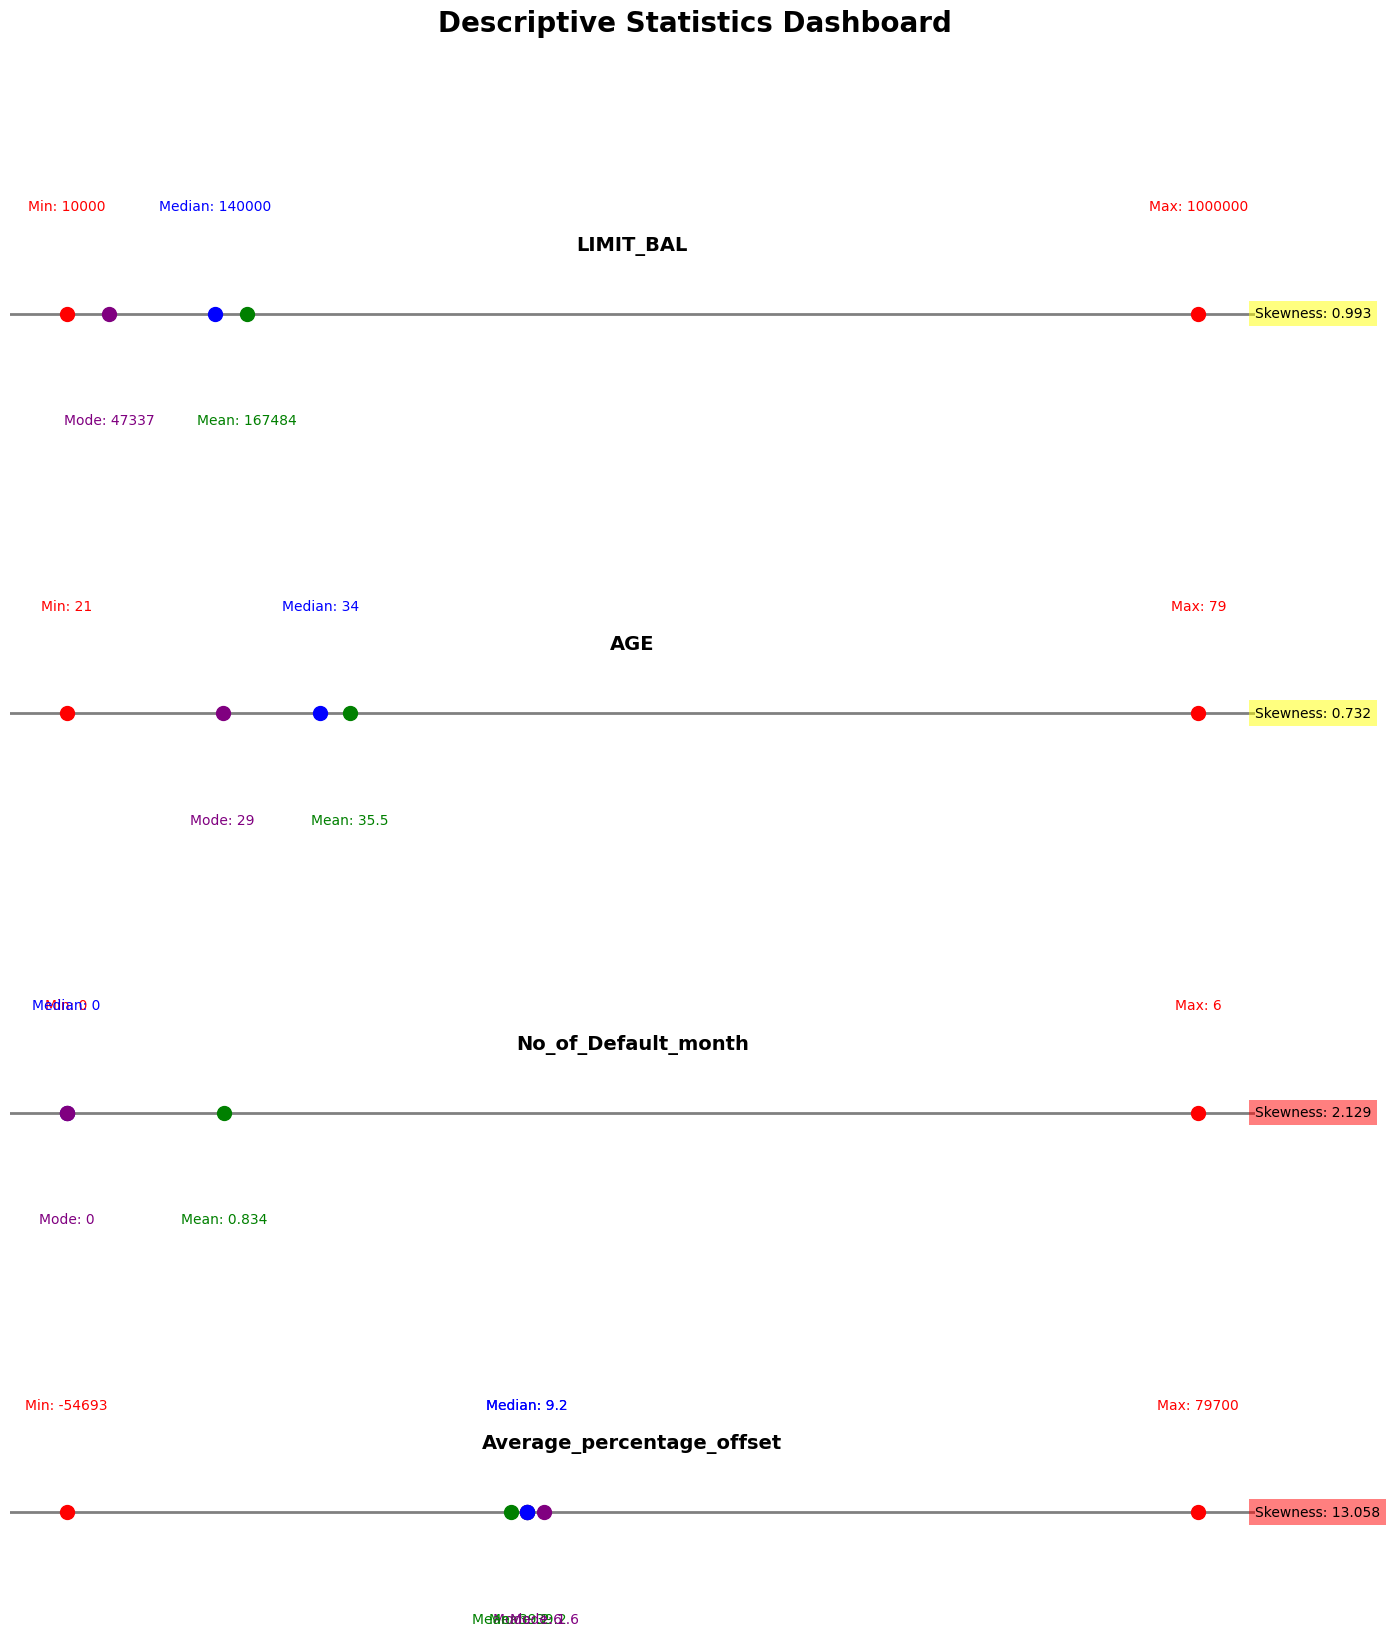

In [28]:
import matplotlib.pyplot as plt
import numpy as np


variables = {
    'LIMIT_BAL': {
        'min': 10000, 'max': 1000000, 'mean': 167484, 'median': 140000, 'mode': 47337,
        'skewness': 0.993
    },
    'AGE': {
        'min': 21, 'max': 79, 'mean': 35.5, 'median': 34, 'mode': 29,
        'skewness': 0.732
    },
    'No_of_Default_month': {
        'min': 0, 'max': 6, 'mean': 0.834, 'median': 0, 'mode': 0,
        'skewness': 2.129
    },
    'Average_percentage_offset': {
        'min': -54693, 'max': 79700, 'mean': 39.2, 'median': 9.2, 'mode': 1.6,
        'skewness': 13.058
    }
}


fig, axs = plt.subplots(4, 1, figsize=(14, 18))
fig.suptitle('Descriptive Statistics Dashboard', fontsize=20, fontweight='bold')


def get_skewness_color(skewness):
    if skewness < 0.5:
        return 'green'
    elif skewness < 1:
        return 'yellow'
    elif skewness < 2:
        return 'orange'
    else:
        return 'red'


for i, (var_name, var_data) in enumerate(variables.items()):
    ax = axs[i]


    ax.axhline(y=0, xmin=0, xmax=1, color='gray', linewidth=2)


    data_range = var_data['max'] - var_data['min']
    positions = {
        'min': (var_data['min'] - var_data['min']) / data_range,
        'max': (var_data['max'] - var_data['min']) / data_range,
        'mean': (var_data['mean'] - var_data['min']) / data_range,
        'median': (var_data['median'] - var_data['min']) / data_range,
        'mode': (var_data['mode'] - var_data['min']) / data_range
    }

    ax.scatter(positions['min'], 0, color='red', s=100, zorder=5)
    ax.scatter(positions['max'], 0, color='red', s=100, zorder=5)
    ax.scatter(positions['mean'], 0, color='green', s=100, zorder=5)
    ax.scatter(positions['median'], 0, color='blue', s=100, zorder=5)
    ax.scatter(positions['mode'], 0, color='purple', s=100, zorder=5)


    ax.text(positions['min'], 0.1, f"Min: {var_data['min']}", ha='center', va='bottom', color='red')
    ax.text(positions['max'], 0.1, f"Max: {var_data['max']}", ha='center', va='bottom', color='red')
    ax.text(positions['mean'], -0.1, f"Mean: {var_data['mean']}", ha='center', va='top', color='green')
    ax.text(positions['median'], 0.1, f"Median: {var_data['median']}", ha='center', va='bottom', color='blue')
    ax.text(positions['mode'], -0.1, f"Mode: {var_data['mode']}", ha='center', va='top', color='purple')


    if var_name == 'Average_percentage_offset':
        offset = 0.015  # slight offset to differentiate overlapping points
        ax.scatter(positions['mean'] - offset, 0, color='green', s=100, zorder=5)
        ax.scatter(positions['median'], 0, color='blue', s=100, zorder=5)
        ax.scatter(positions['mode'] + offset, 0, color='purple', s=100, zorder=5)
        ax.text(positions['mean'] - offset, -0.1, f"Mean: {var_data['mean']}", ha='center', va='top', color='green')
        ax.text(positions['median'], 0.1, f"Median: {var_data['median']}", ha='center', va='bottom', color='blue')
        ax.text(positions['mode'] + offset, -0.1, f"Mode: {var_data['mode']}", ha='center', va='top', color='purple')


    skewness_color = get_skewness_color(var_data['skewness'])
    ax.text(1.05, 0, f"Skewness: {var_data['skewness']:.3f}", ha='left', va='center',
            bbox=dict(facecolor=skewness_color, edgecolor='none', alpha=0.5))


    ax.set_title(var_name, fontsize=14, fontweight='bold')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-34-c2cc426f5b3f>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='EDUCATION', ax=axs[0, 1], palette='viridis')
<ipython-input-34-c2cc426f5b3f>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MARRIAGE', ax=axs[0, 2], palette='viridis')
<ipython-input-34-c2cc426f5b3f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='default payment next month', ax=axs[1, 1], palette='viridis')


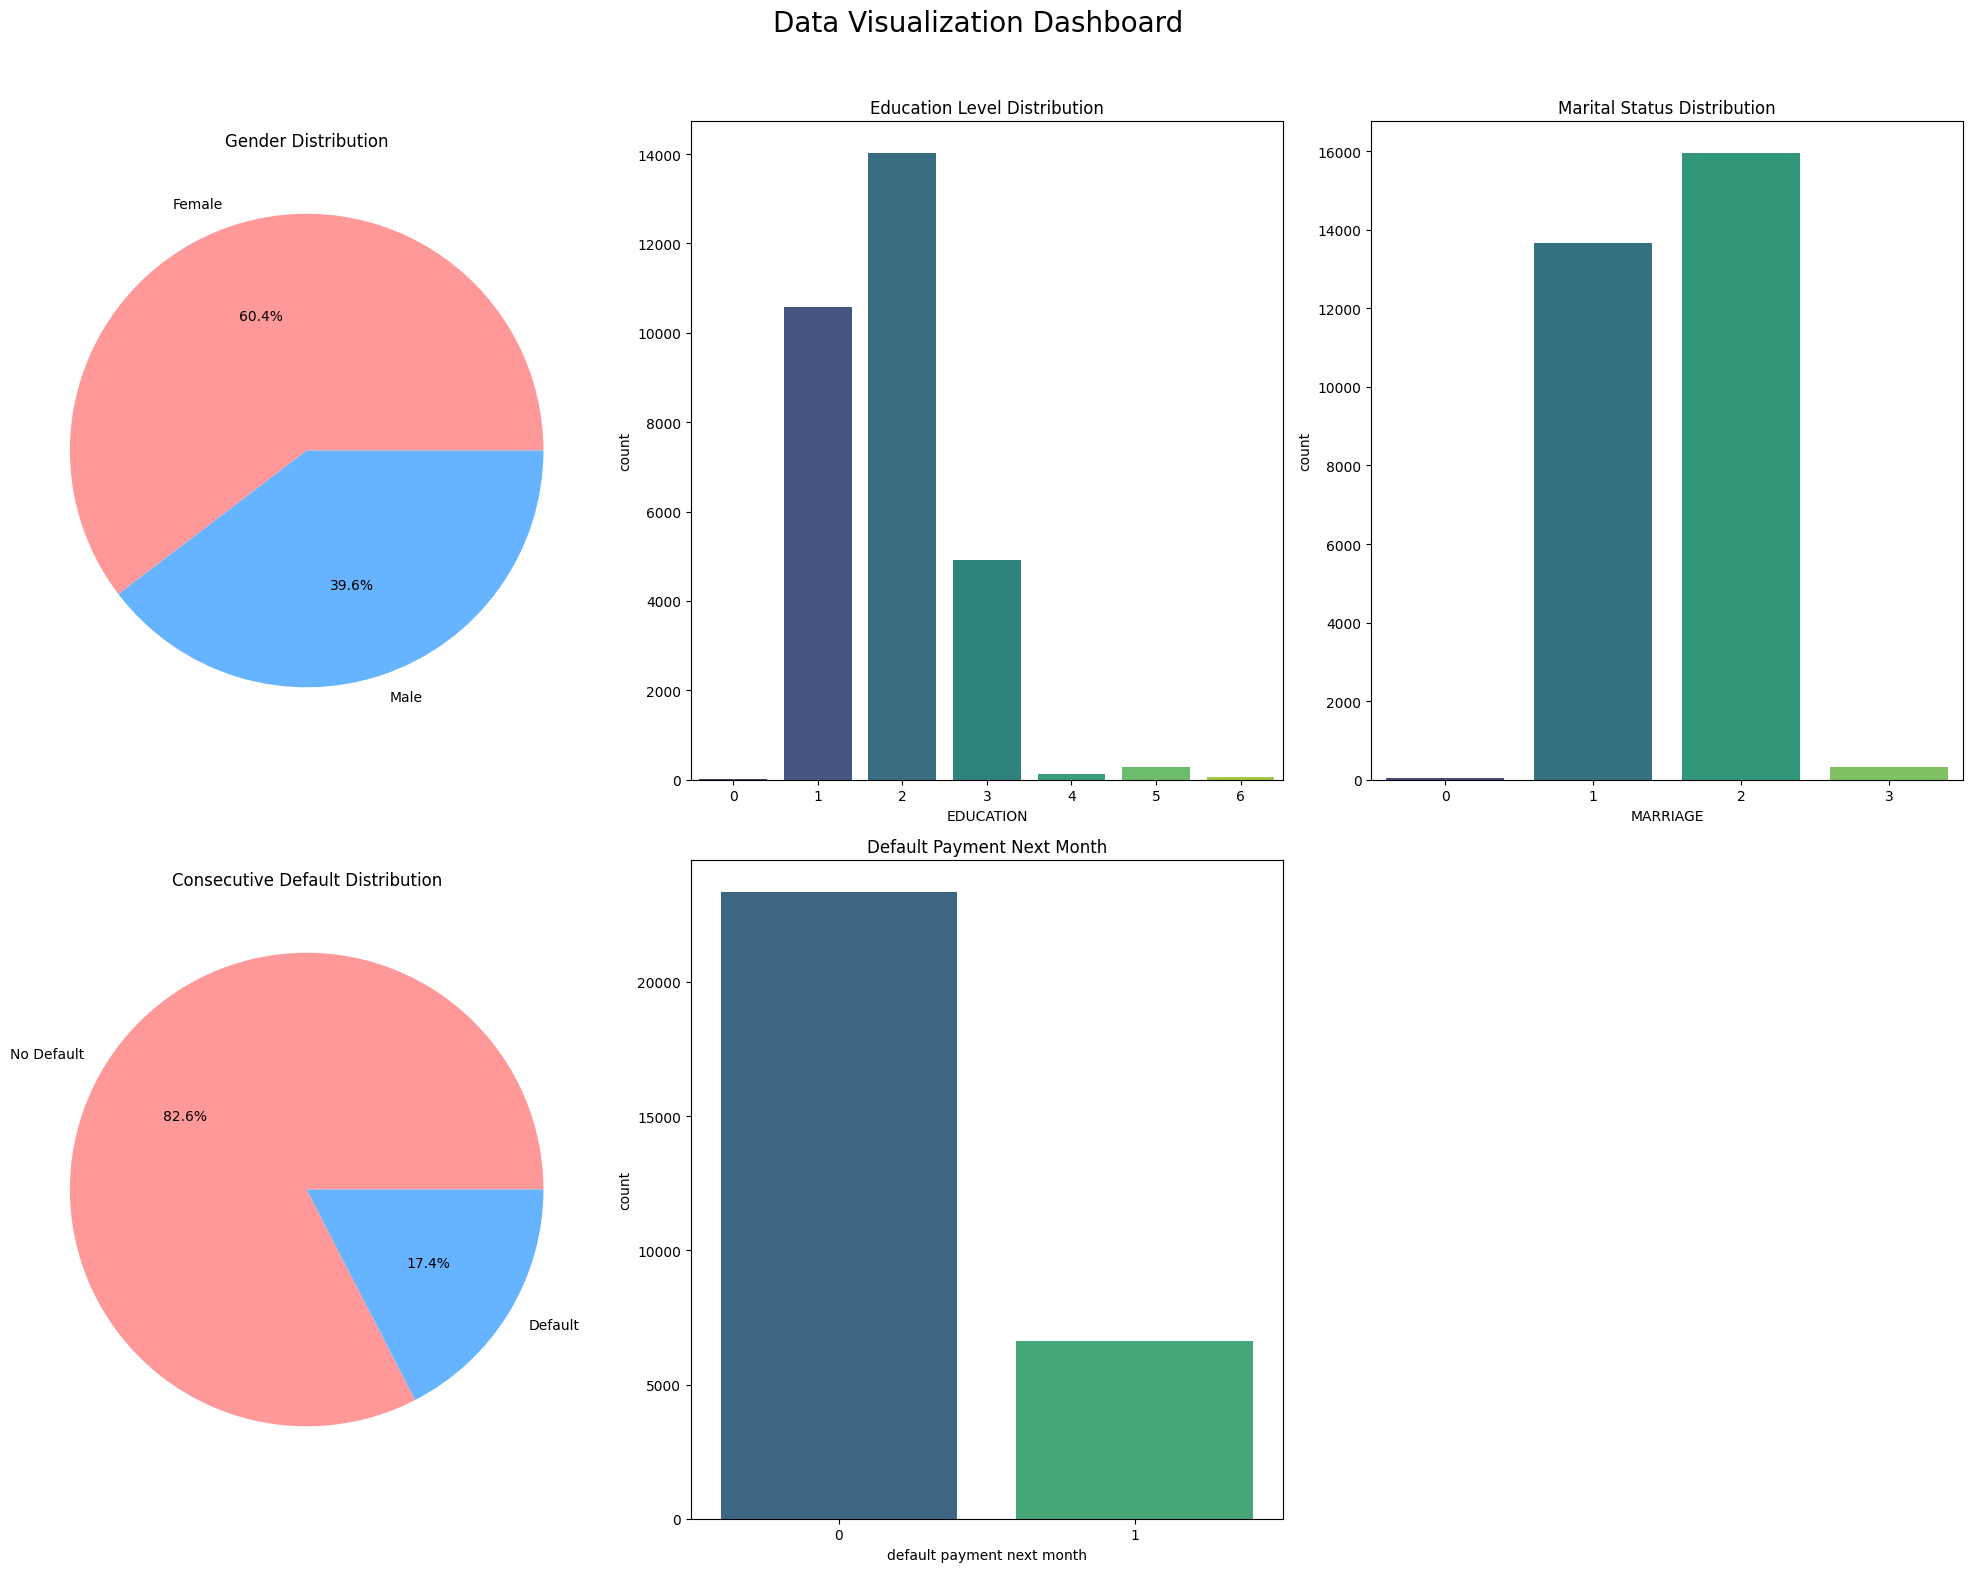

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/default of credit card clients - Data.csv'
df = pd.read_csv(file_path, header=1)
# Convert 'PAY_0' to 'PAY_6' columns to numeric, errors='coerce' will turn any non-numeric values to NaN
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#default in consecutive months
df['Consecutive_Defaults'] = ((df['PAY_0'] > 0) & (df['PAY_2'] > 0)) | \
                             ((df['PAY_2'] > 0) & (df['PAY_3'] > 0)) | \
                             ((df['PAY_3'] > 0) & (df['PAY_4'] > 0)) | \
                             ((df['PAY_4'] > 0) & (df['PAY_5'] > 0)) | \
                             ((df['PAY_5'] > 0) & (df['PAY_6'] > 0))

#number of months defaulted
df['Months_Defaulted'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

# average payment amount and bill amount across six months
df['Average_Payment_Amount'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
df['Average_Bill_Amount'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# ratio of the average payment amount to the average bill amount
df['Payment_to_Bill_Ratio'] = df['Average_Payment_Amount'] / df['Average_Bill_Amount']


df.head()

# Data visualization
fig, axs = plt.subplots(2, 3, figsize=(20, 16))
fig.suptitle('Data Visualization Dashboard', fontsize=20)

# SEX Distribution - Pie Chart
axs[0, 0].pie(df['SEX'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axs[0, 0].set_title('Gender Distribution')

# EDUCATION Distribution - Bar Chart
sns.countplot(data=df, x='EDUCATION', ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Education Level Distribution')

# MARRIAGE Distribution - Bar Chart
sns.countplot(data=df, x='MARRIAGE', ax=axs[0, 2], palette='viridis')
axs[0, 2].set_title('Marital Status Distribution')

# Consecutive_Defaults - Pie Chart (Corrected column name)
axs[1, 0].pie(df['Consecutive_Defaults'].value_counts(), labels=['No Default', 'Default'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axs[1, 0].set_title('Consecutive Default Distribution')

# Default Payment Next Month - Bar Chart
sns.countplot(data=df, x='default payment next month', ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Default Payment Next Month')

# Remove the unused subplot
fig.delaxes(axs[1, 2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [35]:

# target variable
target_var = 'default payment next month'

# Filter non-defaulters (label 0) and defaulters (label 1)
non_defaulters = df[df[target_var] == 0]
defaulters = df[df[target_var] == 1]

# Keep every 3rd non-defaulter and remove the rest
non_defaulters_reduced = non_defaulters.iloc[::3, :]


balanced_df = pd.concat([non_defaulters_reduced, defaulters])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


balanced_df.to_csv('balanced_dataset.csv', index=False)


print("Original Non-Defaulters: ", len(non_defaulters))
print("Reduced Non-Defaulters: ", len(non_defaulters_reduced))
print("Defaulters: ", len(defaulters))
print("Balanced Dataset: ", len(balanced_df))

Original Non-Defaulters:  23364
Reduced Non-Defaulters:  7788
Defaulters:  6636
Balanced Dataset:  14424


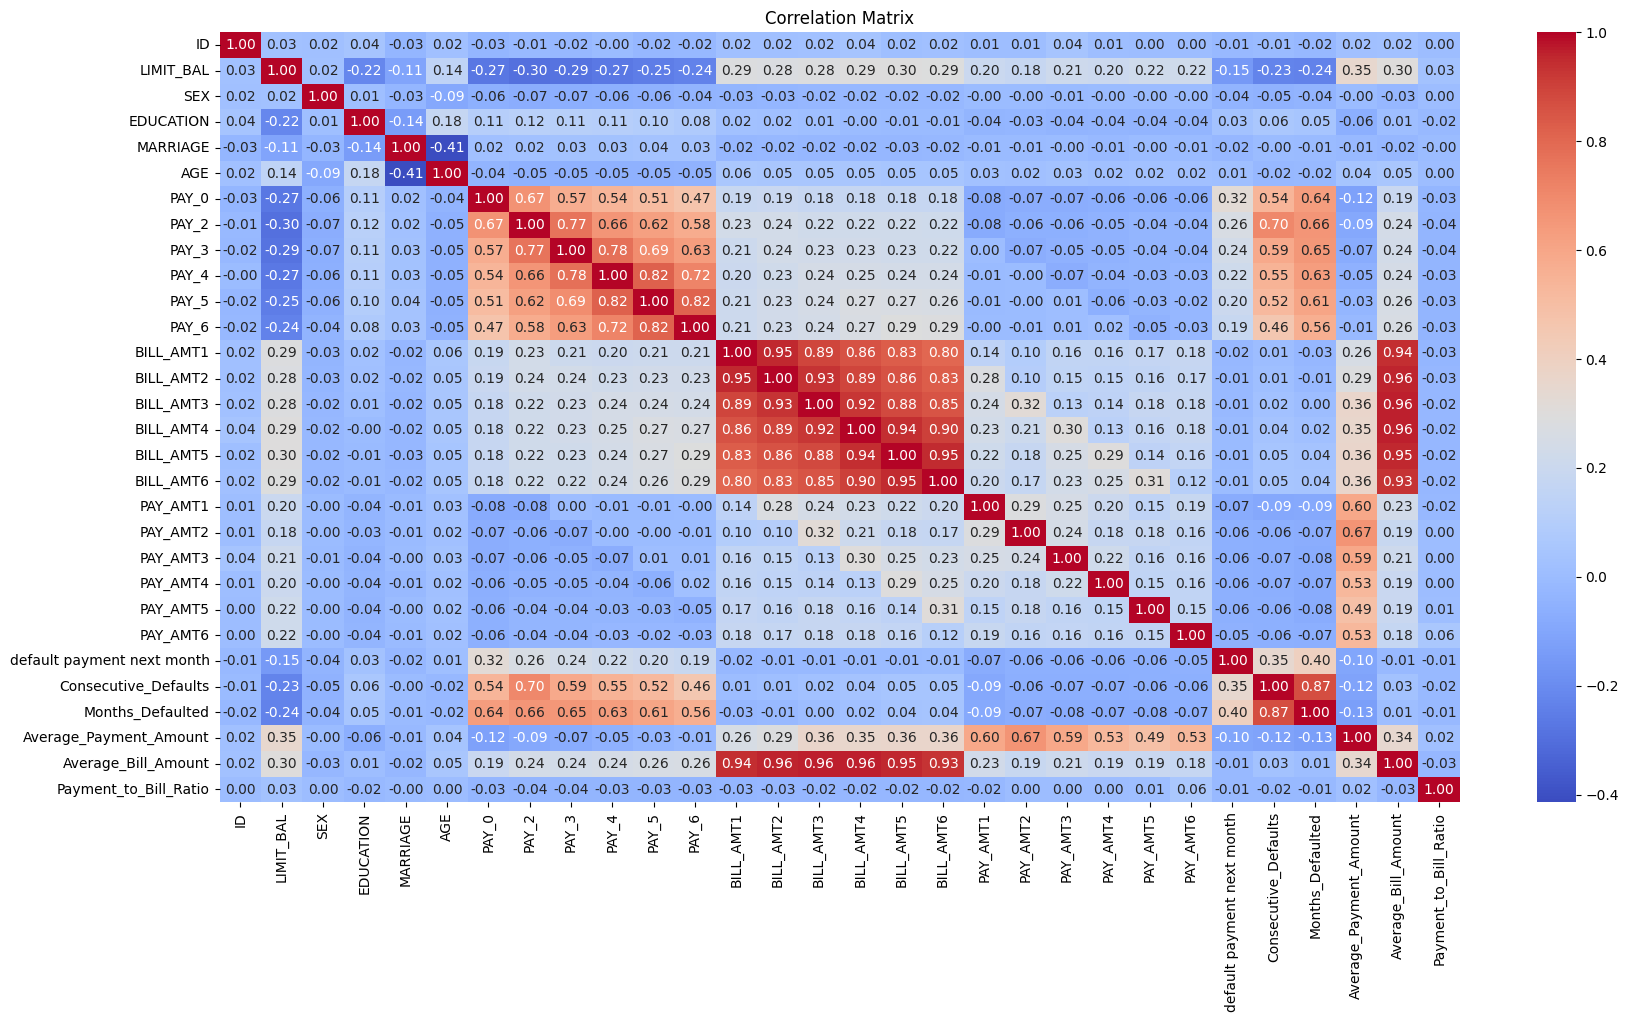

Variables with high correlation with the target variable (>= 0.1): ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Consecutive_Defaults', 'Months_Defaulted', 'Average_Payment_Amount']
Pairs of variables with high correlation with each other (>= 0.1): [('LIMIT_BAL', 'AGE'), ('LIMIT_BAL', 'BILL_AMT1'), ('LIMIT_BAL', 'BILL_AMT2'), ('LIMIT_BAL', 'BILL_AMT3'), ('LIMIT_BAL', 'BILL_AMT4'), ('LIMIT_BAL', 'BILL_AMT5'), ('LIMIT_BAL', 'BILL_AMT6'), ('LIMIT_BAL', 'PAY_AMT1'), ('LIMIT_BAL', 'PAY_AMT2'), ('LIMIT_BAL', 'PAY_AMT3'), ('LIMIT_BAL', 'PAY_AMT4'), ('LIMIT_BAL', 'PAY_AMT5'), ('LIMIT_BAL', 'PAY_AMT6'), ('LIMIT_BAL', 'Average_Payment_Amount'), ('LIMIT_BAL', 'Average_Bill_Amount'), ('EDUCATION', 'AGE'), ('EDUCATION', 'PAY_0'), ('EDUCATION', 'PAY_2'), ('EDUCATION', 'PAY_3'), ('EDUCATION', 'PAY_4'), ('PAY_0', 'PAY_2'), ('PAY_0', 'PAY_3'), ('PAY_0', 'PAY_4'), ('PAY_0', 'PAY_5'), ('PAY_0', 'PAY_6'), ('PAY_0', 'BILL_AMT1'), ('PAY_0', 'BILL_AMT2'), ('PAY_0', 'BILL_AMT3'), ('PAY_

In [38]:

correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#variables with a high correlation with the target variable (default payment next month)
target_variable = 'default payment next month'
high_correlation_vars = correlation_matrix[target_variable][correlation_matrix[target_variable].abs() >= 0.1].index.tolist()
high_correlation_vars.remove(target_variable)  # remove the target variable itself
print("Variables with high correlation with the target variable (>= 0.1):", high_correlation_vars)

#variables with high correlation with each other (>= 0.5)

mask = (correlation_matrix >= 0.1) & (correlation_matrix != 1)

#listed for high inter-correlation
high_inter_corr_pairs = []

# pairs of highly correlated variables
for i in range(len(mask.columns)):
    for j in range(i+1, len(mask.columns)):
        if mask.iloc[i, j]:
            high_inter_corr_pairs.append((mask.columns[i], mask.columns[j]))

print("Pairs of variables with high correlation with each other (>= 0.1):", high_inter_corr_pairs)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:40:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Feature importances: [0.01926023 0.02436189 0.01828032 0.02085827 0.01725926 0.01943702
 0.35610154 0.10517824 0.05164372 0.04054574 0.03718862 0.03164675
 0.02321965 0.02265947 0.01932098 0.02040159 0.01903135 0.0208721
 0.02325254 0.02123177 0.02548405 0.0214792  0.02020024 0.02108549]


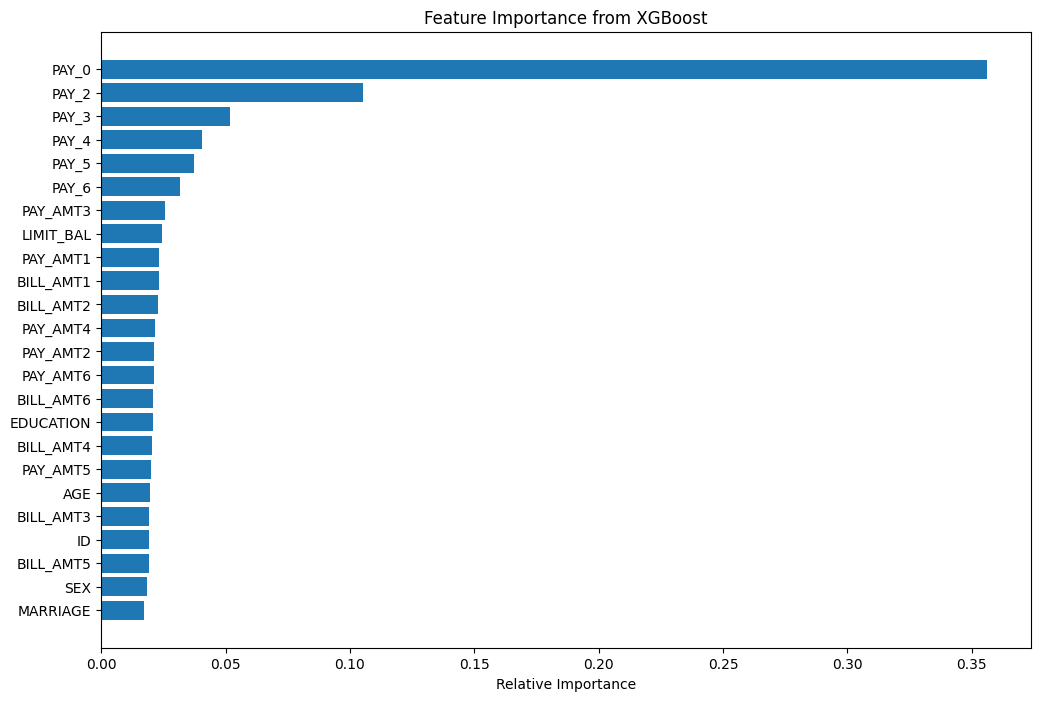

Important features selected by XGBoost: ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT3', 'LIMIT_BAL', 'PAY_AMT1', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT4', 'PAY_AMT2', 'PAY_AMT6', 'BILL_AMT6', 'EDUCATION', 'BILL_AMT4', 'PAY_AMT5', 'AGE', 'BILL_AMT3', 'ID', 'BILL_AMT5', 'SEX', 'MARRIAGE']


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load and preprocess the dataset
file_path = '/content/drive/MyDrive/default of credit card clients - Data.csv'
df = pd.read_csv(file_path, header=1)

# Check and handle NaN or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Print feature importances
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# feature importances
feature_names = X.columns

# DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Relative Importance')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()
plt.show()

# threshold for selecting important features
importance_threshold = 0.01
important_features_xgb = importance_df[importance_df['Importance'] >= importance_threshold]['Feature'].tolist()

# List of variables with high correlation with the target variable (from previous analysis)
corr_features = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Consecutive_Default', 'No_of_Default_month']


print("Important features selected by XGBoost:", important_features_xgb)

Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      1549
           1       0.73      0.58      0.64      1336

    accuracy                           0.70      2885
   macro avg       0.71      0.70      0.70      2885
weighted avg       0.71      0.70      0.70      2885



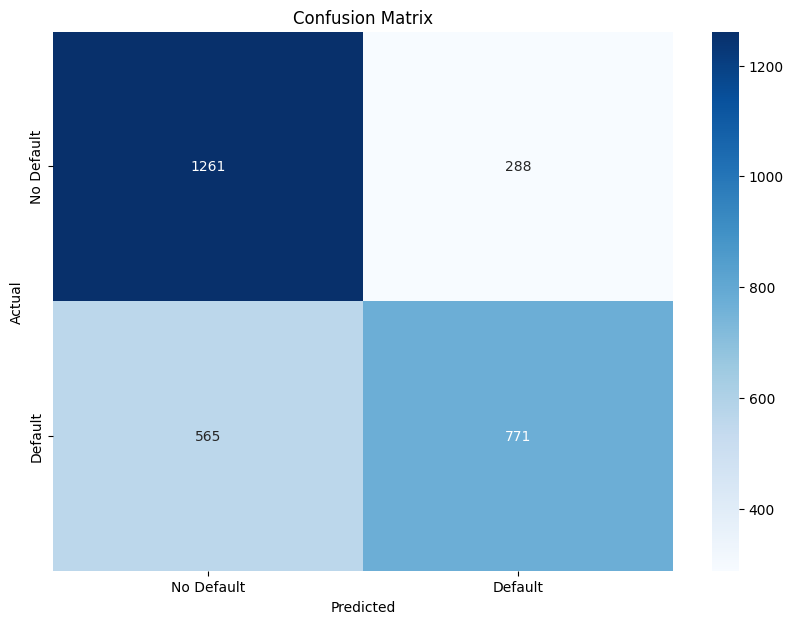

<ipython-input-47-0a4440fd7f8b>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


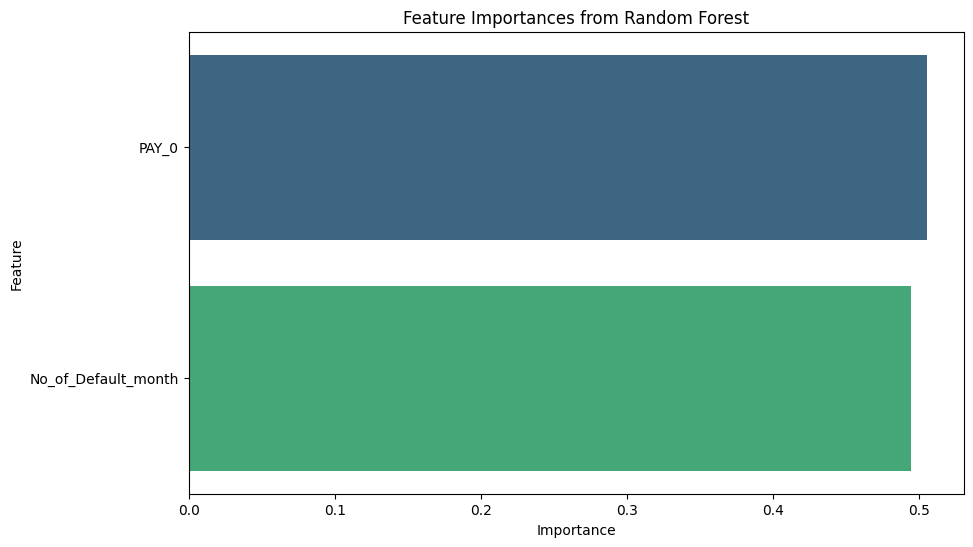

In [47]:
###### RANDOM FOREST######
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# features and the target variable
# Example of adding 'No_of_Default_month' if it was missing
df['No_of_Default_month'] = (df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)
selected_features = ['PAY_0', 'No_of_Default_month']
X = df[selected_features]
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# predictions on the test set
y_pred = rf_model.predict(X_test)
# model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042462 sha256=c57deb9a99914a52605661fbeda92e70996fe94bcc231f23779cf2dea009c638
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex
Preparation of a new explainer is initiated

  -> data              : 2885 rows 2 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2885 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Credit Scoring Model
  -> predict function  : <function yhat_proba_default at 0x783c7491ad40> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.266, mean = 0.458, max = 1.0
  -> model typ

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

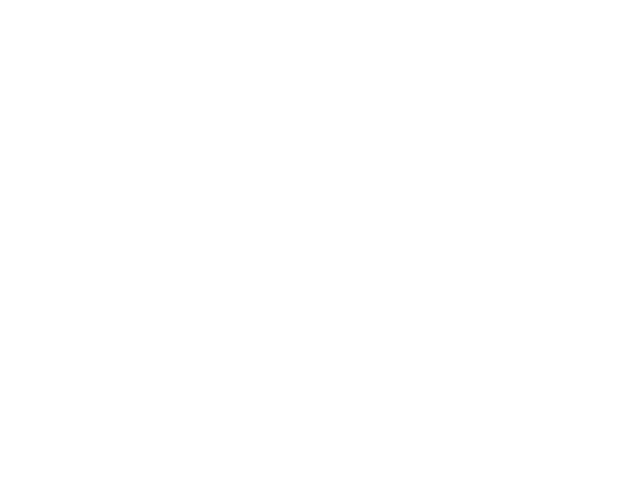

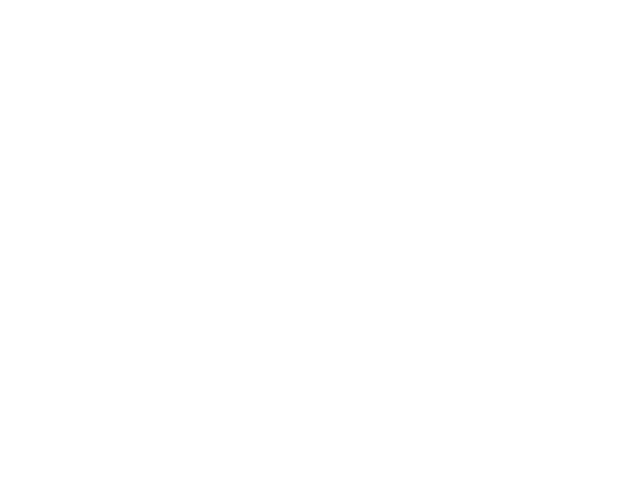

Calculating accumulated dependency: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

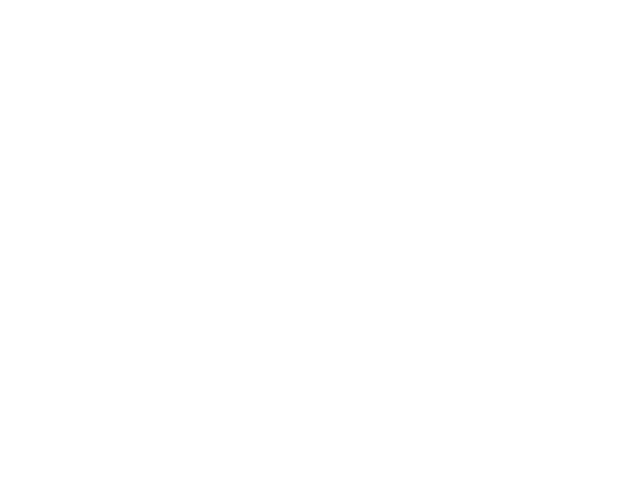

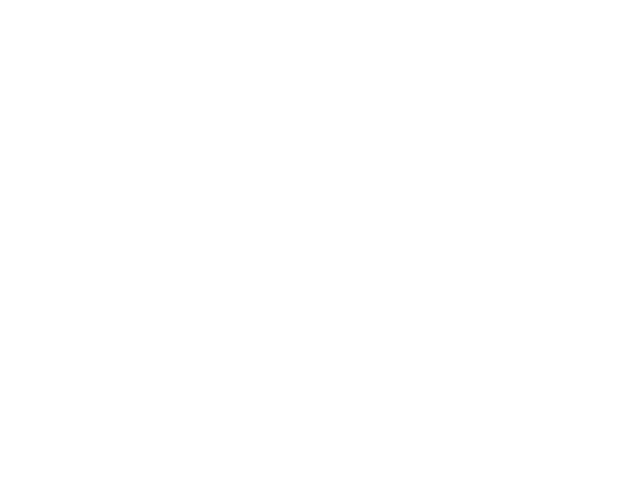

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

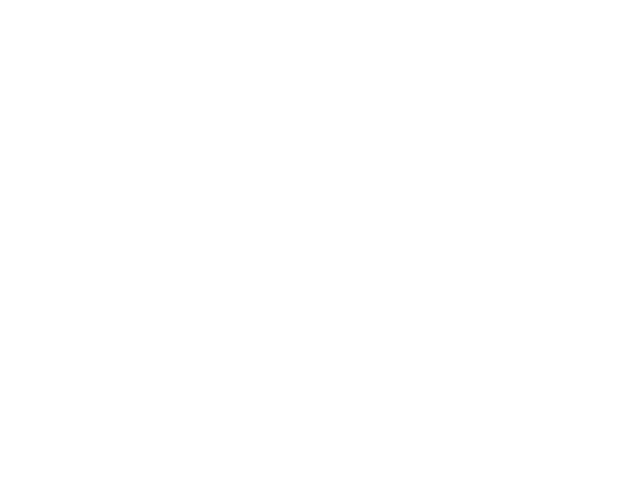

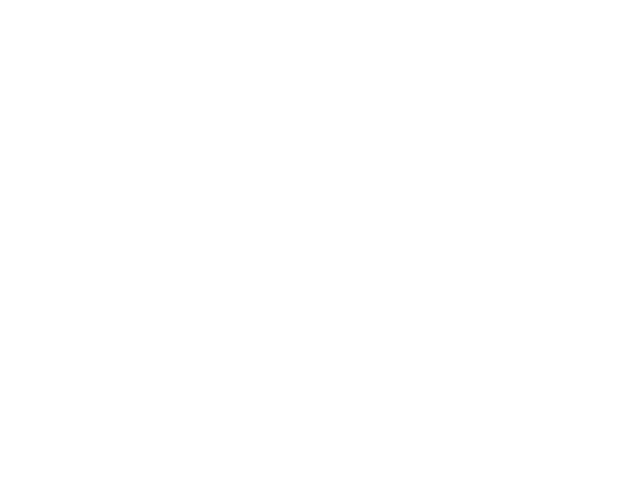

<Figure size 640x480 with 0 Axes>

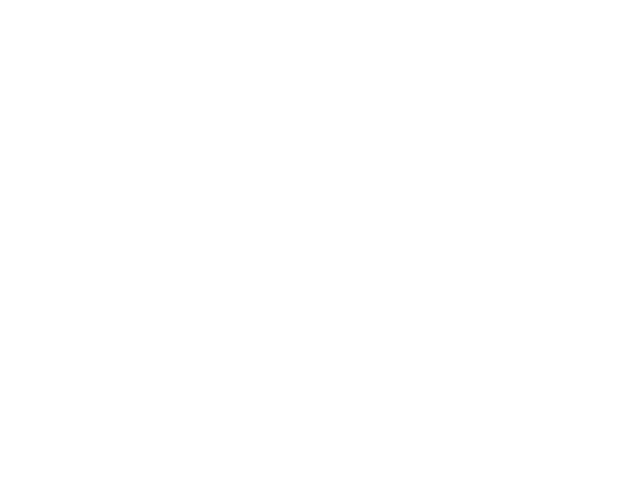

In [49]:
####  DALEX ####
!pip install dalex
import dalex as dx
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Dalex explainer
explainer = dx.Explainer(rf_model, X_test, y_test, label="Random Forest Credit Scoring Model")

# Partial Dependence Plots
pdp_pay0 = explainer.model_profile(variables=['PAY_0'])
pdp_defaults = explainer.model_profile(variables=['No_of_Default_month'])
pdp_pay0.plot(title="PDP for PAY_0")
plt.savefig('pdp_pay0.png')
plt.show()
pdp_defaults.plot(title="PDP for No_of_Default_month")
plt.savefig('pdp_defaults.png')
plt.show()


display(Image(filename='pdp_pay0.png'))
display(Image(filename='pdp_defaults.png'))

# Individual Conditional Expectation (ICE) Plots
ice_pay0 = explainer.model_profile(variables=['PAY_0'], type='accumulated')
ice_defaults = explainer.model_profile(variables=['No_of_Default_month'], type='accumulated')
ice_pay0.plot(title="ICE Plot for PAY_0")
plt.savefig('ice_pay0.png')
plt.show()

ice_defaults.plot(title="ICE Plot for No_of_Default_month")
plt.savefig('ice_defaults.png')
plt.show()


display(Image(filename='ice_pay0.png'))
display(Image(filename='ice_defaults.png'))

#  Break Down Plots for Individual Predictions
high_risk = X_test[y_test == 1].iloc[0]
low_risk = X_test[y_test == 0].iloc[0]

breakdown_high = explainer.predict_parts(high_risk, type='break_down')
breakdown_low = explainer.predict_parts(low_risk, type='break_down')

# Break Down plots
breakdown_high.plot(title="Break Down Plot - High Risk Individual")
plt.savefig('breakdown_high.png')
plt.show()

breakdown_low.plot(title="Break Down Plot - Low Risk Individual")
plt.savefig('breakdown_low.png')
plt.show()

display(Image(filename='breakdown_high.png'))
display(Image(filename='breakdown_low.png'))

# Model Parts Analysis
feature_importance = explainer.model_parts()

# Feature Importance
feature_importance.plot(title="Global Feature Importance")
plt.savefig('global_importance.png')
plt.show()

# Display the saved image
display(Image(filename='global_importance.png'))
